In [3]:
from google.colab import drive
import os
drive.mount('/gdrive')
%cd /gdrive
%cd /gdrive/My Drive/Colab Notebooks/dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive
/gdrive/My Drive/Colab Notebooks/dataset


==== Training model on data set A ====
[-1.  1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1.  1.
  1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1.  1. -1.  1.  1.  1. -1. -1.
 -1.  1.  1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1.  1.
 -1. -1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1.  1.  1. -1.  1.  1.
  1. -1.  1.  1.  1.  1. -1.  1.  1. -1.]
Finished 10000 iterations; Diff theta: 8.63552009434719e-05; theta: [-20.76243905  21.3994267   19.80088131]; Grad: [ 4.96096159e-06 -5.11257608e-06 -4.88084349e-06]
Finished 20000 iterations; Diff theta: 1.0838904456623195e-10; theta: [-20.81437784  21.45295156  19.85198173]; Grad: [ 3.11338974e-12 -3.20839939e-12 -3.06318841e-12]
Converge after 25080 iteration

==== Training model on data set B ====
Finished 10000 iterations; Diff theta: 0.005138875616747641; theta: [-40.92233371  41.14884443  40.8368738 ]; Grad: [ 0.00029677 -0.0002954  -0.00029

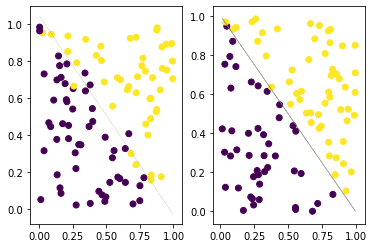

In [10]:
try:
    xrange
except NameError:
    xrange = range

def add_intercept(X_):
    m, n = X_.shape
    X = np.zeros((m, n + 1))
    X[:, 0] = 1
    X[:, 1:] = X_
   # print(X)
    return X

def load_data(filename):
    D = np.loadtxt(filename)
    Y = D[:, 0]
    X = D[:, 1:]
    return add_intercept(X), Y

def calc_grad(X, Y, theta):
    m, n = X.shape
    #print(m)
    #grad = np.zeros(theta.shape)

    margins = Y * X.dot(theta)
    #print("margin:",margins.shape)
    probs = 1. / (1 + np.exp(margins))
    #print(probs.shape)
    grad = -(1./m) * (X.T.dot(probs * Y))
    #print("grad:",grad.shape)
    return grad

def logistic_regression(X, Y):
    m, n = X.shape
    theta = np.zeros(n) 
    thetas=[]
    i = 0
    while True:
        i += 1
        learning_rate=i*0.001
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta  - learning_rate * (grad)
        norm = np.linalg.norm(prev_theta - theta)
        if i % 10000 == 0:
            print('Finished {0} iterations; Diff theta: {1}; theta: {2}; Grad: {3}'.format(
                i, norm, theta, grad))
            thetas.append(theta)
        if i >= 100000:
            print('Stop at %d iteration' % i)
            break
        if norm<1e-15:
          print('Converge after %d iteration' %i) 
          break
    return thetas

def main():
    print('==== Training model on data set A ====')
    Xa, Ya = load_data('data_a.txt')
    print(Ya)
    thetas_a=logistic_regression(Xa, Ya)

    print('\n==== Training model on data set B ====')
    Xb, Yb = load_data('data_b.txt')
    thetas_b=logistic_regression(Xb, Yb)
    data_a=np.loadtxt('data_a.txt')
    data_b=np.loadtxt('data_b.txt')
    xa=data_a[:,1]
    ya=data_a[:,2]
    labela=data_a[:,0]
    labela=np.clip(labela,0,1)
    xb=data_b[:,1]
    yb=data_b[:,2]
    labelb=data_b[:,0]
    labelb=np.clip(labelb,0,1)
    ax1=plt.subplot(1,2,1)
    ax2=plt.subplot(1,2,2)
    plt.sca(ax1)
    plt.scatter(xa,ya,c=labela)
    _xa=np.array([np.min(xa),np.max(xa)])
    for theta in thetas_a:
      _ya=(theta[0]+theta[1]*_xa)/(-theta[2])
      plt.plot(_xa,_ya,lw=0.1)
    plt.sca(ax2)
    plt.scatter(xb,yb,c=labelb)
    _xb=np.array([np.min(xb),np.max(xb)])
    last_theta=np.ones(thetas_a[0].shape)
    for theta in thetas_b:
      _yb=(theta[0]+theta[1]*_xb)/(-theta[2])
      plt.plot(_xb,_yb,lw=0.1)
      scale=theta[1]
      theta/=scale
      #print(theta-last_theta)
      last_theta=theta.copy()
    return

if __name__ == '__main__':
    main()